<b>K-Means Clustering Example #1</b>
    
In this example, we will read the clustering results into a Pandas dataframe, calculate LogP for each compound, and select the compound from each cluster with the lowest LogP.<br/>
The input file was created using this command<br/>
<pre>kmeans.py all --in test10K.smi --out test10K_clusters.csv --clusters 100</pre> 
which clustered 10,000 molecules into 100 clusters.

We start by using a Jupyter "magic" command to display plots in the page. 

In [2]:
%matplotlib inline

Next we need a few imports, all of these should be included when the RDKit is installed.  If you don't have the RDKit installed you can do it with this command.
<pre>conda create -c rdkit -n my-rdkit-env rdkit</pre>

In [3]:
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem.Crippen import MolLogP

Read the clustering ouput file into a dataframe.

In [59]:
df = pd.read_csv("Results_clusters_k5_PubChem_Mol1_Alta1.csv")

Let's display number of compounds in each cluster to get an overview of results.

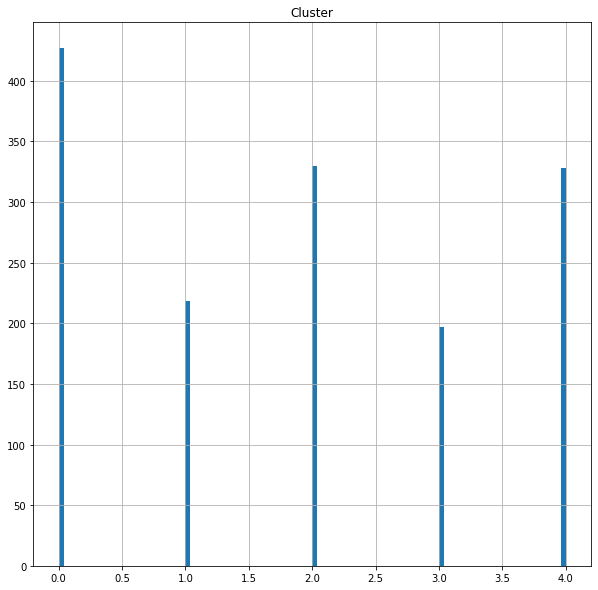

In [60]:
ax = df.hist("Cluster",bins=100,figsize=(10,10))

As a quick check, we'll take a look at the first few rows of the dataframe. 

In [10]:
df.head()

,SMILES,Name,Cluster,Center
0,CC(=O)[C@@H](C)C(=O)SCCNC(=O)CCNC(=O)[C@H](O)C...,2-METHYL-ACETO-ACETYL-COA,1,No
1,CC[C@@H](C)C(=O)SCCNC(=O)CCNC(=O)[C@@H](O)C(C)...,2-METHYL-BUTYRYL-COA,1,No
2,C[C@](CO)(OP(=O)([O-])[O-])[C@H](O)CO[P@@](=O)...,2-PHOSPHO-4-CYTIDINE-5-DIPHOSPHO-2-C-MET,1,No
3,CC(C)(CO[P@@](=O)([O-])O[P@](=O)([O-])OC[C@@H]...,3-HYDROXY-PROPIONYL-COA,1,No
4,O=C(/C=C\c1ccc(O)cc1)O[C@H]1C[C@@](O)(C(=O)[O-...,4-COUMAROYLQUINATE,0,No


We can use the <b>PandasTools</b> module in the RDKit to add a molecule object to each row in the dataframe.

In [15]:
PandasTools.AddMoleculeColumnToFrame(df,'SMILES','Name')

Now when we display the dataframe, we see chemical structures with each row. 

In [ ]:
df.head()

As we mentioned above our goal is to select the molecule with the lowest LogP in each cluster.  In order to do this, we need to calculate LogP.  We will use another Jupyter magic "%time" to see how long it takes to calculate 10,000 LogP values.  On my MacBook Pro, this takes about 7 seconds. 

In [8]:
%time df['LogP'] = [MolLogP(x) for x in df.Mol]

Wall time: 1.09 s


As we can see below, the LogP value has been added to the dataframe. 

In [10]:
df.head(10)

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

                                              SMILES       Name  Cluster  \
0  O=C(OC[C@@H]1O[C@H](Oc2ccc(O)cc2COC(=O)[C@@]2(...   60165189        0   
1  CN(C)[C@H]1C(=O)[C@H](C(N)=O)C(=O)[C@]2(O)C(=O...   90707048        2   
2  COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...  122413629        0   
3  COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...   56840906        0   
4  CO[C@@H]1O[C@H](CC[C@@H]2O[C@H](CC[C@H]3O[C@H]...  100932010        1   
5  COOC[C@H]1O[C@H](OC(=O)Nc2ccc(COC(=O)N[C@H]3C[...   89150149        0   
6  C=C1c2c(Cl)ccc(O)c2C(O)=C2C(=O)[C@]3(O)C(O)=C(...   54714363        3   
7  CN(C)[C@H]1C(=O)C(C(=O)NCN[C@H]2[C@H](O)[C@@H]...  124604701        3   
8  N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](Cc1ccc(O)cc1...   25013110        2   
9  CC(C)(O)CC[C@@H](O)[C@](C)(O)[C@H]1CC[C@]2(O)C...   24836738        1   

  Center                                                Mol    LogP  
0     No  <img data-content="rdkit/molecule" src="data:i... -0.0647  
1     No  <img data-con

In order to select the molecule with the lowest LogP, we will first sort the dataframe by LogP.

In [82]:
df.sort_values("LogP",inplace=True)

Now we can create a new dataframe that only includes the first example of each cluster.  We can do this by using the "drop_duplicates" method of the dataframe.  This method creates a new dataframe with only the first example of each unique cluster. 

In [87]:
selected = pd.DataFrame(df.drop_duplicates("Cluster"))

We now see that the new "selected" dataframe has 100 rows. 

In [84]:
selected.shape

(100, 5)

Now we want to save the selected dataframe as a csv file.  The dataframe contains a molecule column called "Mol".  If we write a csv file containing this column, the output file will include a 64 bit encoded image that we don't want.  One easy way to address this is to remove the "Mol" column from the dataframe. 

In [85]:
selected.drop("Mol",1,inplace=True)

Finally we write the dataframe as a csv.  By setting "index=False" we avoid putting the row number into the csv file as the first column.  By setting "float_format", we limit the LogP values to two decimal places.

In [86]:
selected.to_csv("test10K_selected.csv",index=False,float_format="%0.2f")